## Vectorization & Embeddings[ELMo, BERT/GPT]

Authored by [abhilash1910](https://kaggle.com/abhilash1910/)

### Movie Reviews !!

This is an extension of the [original Notebook](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop) which has been separately provided for a piecewise analysis of creating  NLP Embeddings with Transformers and sophiosticated Neural architectures. For more details other kernels are also provided:

- [Kernel](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop)
- [Kernel](https://www.kaggle.com/abhilash1910/nlp-workshop-ml-india)




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


## Load the Dataset

This is the primary step of the entire pipeline. In this case, we have to load the dataset using pandas.
In this case, we will be exploring different datasets for our use case. We will be using the [IMDB Movie Reviews Dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) primarily for the initial use case. 

The data is collated from [Stanford Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) and the sentiment of the text corpus is either positive or negative.

We will be analysing the data first in terms of the columns which it has.

In [2]:
train_df=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
%%time
#Running the Preprocessing and cleaning phase as well as the TFIDF Vectorization

import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
#Lemmatize the corpus
def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

def tfidf(data):
    tfidfv = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_tfidf


train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))
train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']
train_df['review']=train_df['review'].apply(lambda z: lemma_traincorpus(z))


NameError: name 'WordNetLemmatizer' is not defined

## Convert Input DataFrame to a List

This phase is helpful if we would like to investigate individual word embeddings or sentence embeddings. Differentiating the individual rows of text makes it easier to pass into static and dynamic embedding models.

In [4]:
check_df=list(train_df['review'].str.split())


## Semantic Embeddings

In this context, we will be looking into semantic embeddings. These include embeddings which can either by static and dynamic. Word Embeddings fall under this category. 

Word Embeddings: These are vector space transformations of the words present in the corpus. When converted to vectors, several metrics can be applied like finding similarity, distance measurement between the vectors, numerical transforms of the vectors. With word vectors, we can specify semantic similarity between different words or collection of words. A pictorial representation of word vectors compressed with Dimension reduction methods is [provided below](https://www.tensorflow.org/tutorials/text/word_embeddings):

<img src="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/images/embedding.jpg?raw=1">


In this scenario, we will be focussing on all embedding algorithms. Primarily we be starting with Word2Vec and will be understanding advanced BERT/GPT architectures.

## Dynamic Embeddings

Deep contextual embeddings and sentence/word vectors falls under dynamic embeddings. These embeddings are current SOTA and these are deep contextual embeddings ,implying that there is a need for robust Neural NEtwork models for these architectures.

Since we will not be going into depth about the model architectures of each of these, we will be brushing over the concetps required for creating these embedding models. The following models lie within the scope of these embeddings:

- [ELMO](https://arxiv.org/abs/1802.05365)
- [Transformers](https://arxiv.org/abs/1706.03762)

Both these papers are essentially important for their contributions to contextual deep embeddings.

## ELMO - Brief Overview

ELMO is a contextualised deep embedding model, which is dynamic and semi supervised.
Word representations are functions of entire input sequence,and are computed on top of 2 bidirectional LSTM with character convolutions. The standard architecture for ELMO is as follows:

<img src="https://jalammar.github.io/images/Bert-language-modeling.png">

The most important aspect is tasks specific combinations of intermediate layer representations of the Bilstm which allows retention of the words/long sentence sequences in the embedding space .

[Jay's blog provides a good walkthrough](http://jalammar.github.io/illustrated-bert/).

Bidirectional transfer learning (BiLSTM architecture) is important in this aspect.

<img src="http://jalammar.github.io/images/elmo-forward-backward-language-model-embedding.png">


## Using ELMO Embeddings

Traditionally, Elmo embeddings could be used from [tensorflow hub](https://tfhub.dev/). The original implementation can be found in [AllenNLP](https://allennlp.org/elmo). Some resources for using ELMO :

- [TFHub](https://tfhub.dev/google/elmo/1)
- [ELMO-Good article](https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/)
- [ELMO-article](https://towardsdatascience.com/elmo-contextual-language-embedding-335de2268604)


## Restrictions with Tensorflow TF 2.0


Previously there used to be no issues, working with ELMO from tf hub with tensorflow version <2.0. With TF versions morethan 2.0, there are some issues with loading the embeddings (as eager execution during graph computation fails). Hence it is recommended to use ELMO-2 with Tensorflow <2.0 (favourably 1.15).

ELMO-3 can be used with Tensorflow 2.0 

In [31]:
!pip uninstall tensorflow -y
!pip uninstall tensorflow-cloud -y
!pip install -U tensorflow==1.15

Found existing installation: tensorflow 2.4.0
Uninstalling tensorflow-2.4.0:
  Successfully uninstalled tensorflow-2.4.0
Found existing installation: tensorflow-cloud 0.1.11
Uninstalling tensorflow-cloud-0.1.11:
  Successfully uninstalled tensorflow-cloud-0.1.11
     |████████████████████████████████| 412.3 MB 16 kB/s s eta 0:00:01   |█▎                              | 17.1 MB 4.1 MB/s eta 0:01:38     |████▌                           | 57.4 MB 19.0 MB/s eta 0:00:19     |████▌                           | 58.4 MB 19.0 MB/s eta 0:00:19     |████████████████                | 206.1 MB 9.0 MB/s eta 0:00:24     |█████████████████               | 218.9 MB 11.1 MB/s eta 0:00:18
     |████████████████████████████████| 3.8 MB 38.4 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.1 MB/s  eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=c69966936a5c501aa554cb9108630e438bebe

In [32]:
!pip uninstall pytorch-lightning -y
!pip uninstall tensorflow-probability -y

Found existing installation: pytorch-lightning 1.1.5
Uninstalling pytorch-lightning-1.1.5:
  Successfully uninstalled pytorch-lightning-1.1.5
Found existing installation: tensorflow-probability 0.12.1
Uninstalling tensorflow-probability-0.12.1:
  Successfully uninstalled tensorflow-probability-0.12.1


In [ ]:
import tensorflow as tf
import tensorflow_hub as tf_hub

elmo = tf_hub.Module("https://tfhub.dev/google/elmo/2")
embeddings = elmo(
    ["the cat is on the mat", "dogs are in the fog"],
    signature="default",
    as_dict=True)["elmo"]
embeddings

In [ ]:
import tensorflow as tf
import tensorflow_hub as tf_hub

# from keras.layers import Input, Lambda, Dense
# from keras import backend as k
elmo_embed=tf_hub.Module("https://tfhub.dev/google/elmo/2",trainable=True)

#Creating the elmo embeddings by squeezing the inputs
def create_embedding(z):
    return elmo_embed(tf.squeeze(tf.cast(z,tf.string)),signature='default',as_dict=True)["default"]

In [ ]:
#Convert the textual reviews to list for analysing sentences(sentence vectors)
z=train_df['review'].tolist()

In [ ]:
##Tensorflow Hub ELMO-2
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.load("https://tfhub.dev/google/elmo/2")

def create_elmo_embeddings(data):
    embed=elmo(data,signature="default",as_dict=True)["elmo"]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        out_x=sess.run(embed)
        #out_y=ses.run(tf.reduce_mean(embed,1))
        return out_x
elmo_input=z[:2]
elmo_output=create_elmo_embeddings(elmo_input)


## Transformers



<img src="https://static01.nyt.com/images/2007/07/02/arts/Trans1600.jpg?quality=75&auto=webp&disable=upscale">


We come to Transformer Embeddings  for which the most important aspect is the Transformer architecture. Since we will be diving in depth into architectures in the Machine LEarning Training session (model building), it is safe to have a glimpse of a traditional Transformer Architecture.

<img src="https://i0.wp.com/esciencegroup.com/wp-content/uploads/2020/02/01.png?resize=506%2C641&ssl=1">

We will be working with the [HuggingFace](https://huggingface.co/) repository as it contains all SOTA Transformer models. In this context, it is useful to mention some important resources:

- [Transformer Keras](https://keras.io/examples/nlp/text_classification_with_transformer/)
- [Kaggle Kernel](https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb)


However in this case, since we would be using the models just for extracting embeddings or features, it is important to know the intermediate layers which should be chosen. Since Transformer architectures are really huge, (BERT/GPT variants), it is very complicated to fully understand which layer should be extracted for the features. While BERT, the first Transformer, relies on 2 tokens ([CLS] and [SEP]) ,extracting the sentence embedding vectors are done after extracting the last output layer. However , different models have different number of layers, and in this case, we will exploring a model agnostic way to extract sentence embeddings and performing similarity check with all of the models.


It is recommended to follow this [article](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/) before going further

<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">

## BERT Embeddings

[BERT](https://arxiv.org/abs/1810.04805) is a traditional SOTA transformer architecture published by Google Research which uses bidirectional pretraining . The importance of using BERT is that it has 2 important aspects:

- Msked Language Model (MLM)
- Next Sentence Prediction(NSP)

The bidirectional pre-training is essentially helpful to be used for any tasks. The [Huggingface](https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png) implementation is helpful for fine-tuning BERT for any language modelling task. The BERT architecture falls under an encoder-decoder(Transformer) model as follows:

<img src="https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png">


For fine-tuning and pre-training for different downstream tasks like Q/A, Classification, Language Modelling, Multiple Choice, NER etc. different layers of the BERT are used. 

<img src="https://d3i71xaburhd42.cloudfront.net/df2b0e26d0599ce3e70df8a9da02e51594e0e992/15-Figure4-1.png">



## Finetuning BERT for Embeddings

For finetuning, it is to be kept in mind, there are many ways to do this. We are using BERT from Huggingface repository while it can also be used from [TF-HUB](https://tfhub.dev/s?module-type=text-embedding) or from [Google-Research repository](https://github.com/google-research/bert). The reason for using HuggingFace is that the same codebase is applicable for all language models. The 3 most important input features that any language model asks for is:

- input_ids
- attention_masks
- token_ids

Let us first try to analyse and understand how BERT  tokenizers, and model can be used in this context. The [BERT](https://huggingface.co/transformers/model_doc/bert.html) documentation provides an outline of how to use BERT tokenizers and also modify it for downstream tasks.

Generally by virtue of transfer learning through weight transfer, we use pretrained [BERT models](https://huggingface.co/transformers/pretrained_models.html) from the list. This allows us to finetune it to extract only the embeddings. Since we are using Keras, we have to build up a small model containing an Input Layer and apply the tokenized(encoded) input ids, attention masks as input to the pretrained and loaded BERT model.This is very similar to creating a very own classification model for BERT using Keras/Tensorflow, but since we will be needing only the Embeddings it is safe to extract only the sentence vectors in the last layer of the model output. In most of the cases , we will see that the dimensions of the output vector is (x,768) where x depends on the number of tokenized input features. For this we extract the [CLS] tokenized feature from the ouput to just extract the sentence embeddings.

<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


Some important resources which may be helpful:

- [Blog](https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a)
- [Extensive Nice Blog](https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b)
- [Good Kernel](https://www.kaggle.com/shirishsharma/nlp-from-embeddings-and-rnns-to-bert)



In [5]:
#tokenize and encode the inputs

import transformers
from transformers import BertTokenizer,TFBertModel
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-large-uncased')
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

train_input_ids,train_attention_masks = bert_encode(train_df['review'][:5],1000)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length

In [6]:
#Visualize the attention masks and input ids.
train_attention_masks,train_input_ids


(array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[  101,  2028,  1997, ...,     0,     0,     0],
        [  101,  1037,  6919, ...,     0,     0,     0],
        [  101,  1045,  2245, ...,     0,     0,     0],
        [  101, 10468,  2045, ...,     0,     0,     0],
        [  101,  9004,  3334, ...,     0,     0,     0]]))

In [7]:

#Build a miniature model for extracting the embeddings
import tensorflow as tf
from keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import layers
input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')
bert_output=bert_model([input_ids,input_masks_ids])[0]
bert_output.shape
bert_output[:,0,:]
model=Model(inputs=[input_ids,input_masks_ids],outputs=[bert_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 335141888   input_token[0][0]                
                                                                 masked_token[0][0]               
Total params: 335,141,888
Trainable params: 335,141,888
Non-trainable params: 0
__________________________________________________________________________________________________


## Realize the Size of the BERT Model

The size of the simple NN model built with BERT as intermediate Embedding Layer can be observed. Bert-large-uncased has 24-layer, 1024-hidden, 16-heads, 336M parameters and trained on lower-cased English text.

## Using the Transfomer Method


In this case , we will be using the HuggingFace Transformer method for extracting sentence embeddings. This is a rather simpler method as we only need to extract the last layer from from the model output. The model in this case is bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.Trained on lower-cased English text.).This code segment is model agnostic and can be used for any variats of BERT (except T5, GPT variants).


In [9]:
z=train_df['review'].tolist()

In [10]:
#Use the tokenizer and model  from the Transformers and determine the output features from the last hidden layer.
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

def get_embeddings(model_name,tokenizer,name,inp):
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token
cls_token=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',z[0])
cls_token

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(339, 768), dtype=float32, numpy=
array([[-0.36462224, -0.2641687 , -0.03512385, ..., -0.7208603 ,
         0.4312128 , -0.07924043],
       [-0.4695255 , -0.25975847, -0.34684682, ...,  0.45487207,
         1.1473372 , -0.31036818],
       [-1.1214844 , -0.07516048, -0.19610047, ...,  0.29040718,
         0.45477027, -0.20836154],
       ...,
       [ 0.24181402, -0.55227023,  0.0171169 , ...,  0.04455163,
         0.01808521, -1.0653912 ],
       [ 0.04580492, -0.66926694, -0.47817704, ..., -0.26425996,
         0.14525728, -0.06453234],
       [ 0.0811073 ,  0.014382  ,  0.24242932, ..., -0.32247126,
        -0.10350478, -0.06740489]], dtype=float32)>

(339, 768)


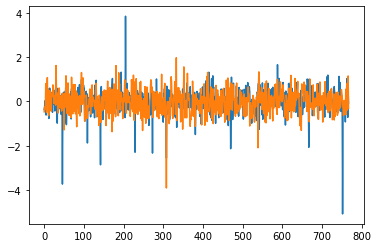

In [12]:
# For visualizing the embeddings 
import matplotlib.pyplot as plt
print(cls_token.shape)
plt.plot(cls_token[0])
plt.plot(cls_token[1])
plt.show()

## Alternate Strategy With Transformers-One For All

Sentence Vectors can be determined with the help of [Pipeline in Transformers](https://huggingface.co/transformers/main_classes/pipelines.html). This is a robust and efficient way to generate sentence vectors and compute corrspoinding distances between those vectors. It is a faster way which applies to almost all transformers.

<img src="https://www.sideshow.com/wp/wp-content/uploads/2019/05/InfinityStones-Infographic-01.jpg">

## DistilBERT

[This](https://huggingface.co/transformers/model_doc/distilbert.html) is a distilled version of pretraining BERT to produce a lightweight version of it. It is analogous to teacher supervision of a neural network learning to optimize tis weights. [DistilBERT Paper](https://arxiv.org/abs/1910.01108) provides an insight why it is 40% smaller but preserves 95% of BERT's weights for transfer learning.

<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_14%2Fproject_391208%2Fimages%2FKD_figures%2Ftransformer_distillation.png">


A very neat representation on the model workflow is provided here:

<img src="http://jalammar.github.io/images/distilBERT/bert-input-to-output-tensor-recap.png">

## The Cosine Distance Metric


In this context, we will be using Cosine similarity metric from [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html). But we can use them after we extract the last hidden layer from the model output(similar to BERT). 

In [13]:
#Distil BERT Embeddings
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine
def transformer_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding('distilbert-base-uncased',z[0],TFDistilBertModel)
embedding_features2=transformer_embedding('distilbert-base-uncased',z[1],TFDistilBertModel)
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


0.9233655446863928


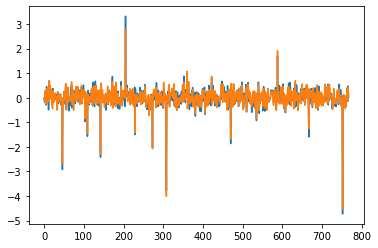

In [14]:
#Visualize embeddings
plt.plot(embedding_features1[0])
plt.plot(embedding_features2[0])

## BERT Embeddings with Alternate Strategy

Here we see the new methodology applied for BERT using the Pipeline module of Trasnformers.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are in

0.8199066269571025


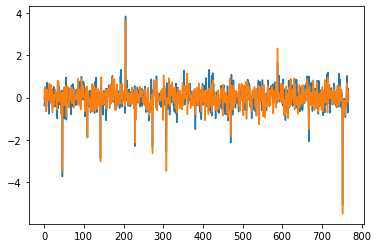

In [15]:
#BERT embeddings
from transformers import AutoTokenizer, pipeline, TFBertModel
bert_features1=transformer_embedding('bert-base-uncased',z[0],TFBertModel)
bert_features2=transformer_embedding('bert-base-uncased',z[1],TFBertModel)
distance=1-cosine(bert_features1[0],bert_features2[0])
print(distance)
plt.plot(bert_features1[0])
plt.plot(bert_features2[0])
plt.show()

## Roberta Model

[Roberta Model](https://huggingface.co/transformers/model_doc/roberta.html) is a robust and large model built by [Facebook Research](https://github.com/pytorch/fairseq/tree/master/examples/roberta), to alleviate undertrained nature of BERT. It trains in much larger mini-batch sizes. [This](https://cloud.google.com/tpu/docs/tutorials/roberta-pytorch) provides a good model of how to train Roberta on Google cloud.The original paper can be found [here](https://arxiv.org/abs/1907.11692), and the model architecture is provided.

<img src="https://camo.githubusercontent.com/f5c0d05eb0635cdd0e17e137265af23fa825b1d4/68747470733a2f2f646c2e666261697075626c696366696c65732e636f6d2f584c4d2f786c6d5f6669677572652e6a7067">


Resources:

- [Blog](https://medium.com/towards-artificial-intelligence/a-robustly-optimized-bert-pretraining-approach-f6b6e537e6a6)
- [Blog-2](https://medium.com/analytics-vidhya/using-roberta-with-fastai-for-nlp-7ed3fed21f6c)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


0.9966970127889705


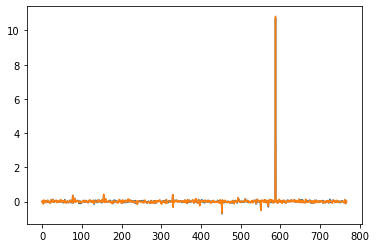

In [16]:
##Roberta Embeddings
from transformers import AutoTokenizer, pipeline, TFRobertaModel
roberta_features1=transformer_embedding('roberta-base',z[0],TFRobertaModel)
roberta_features2=transformer_embedding('roberta-base',z[1],TFRobertaModel)
distance=1-cosine(roberta_features1[0],roberta_features2[0])
print(distance)
plt.plot(roberta_features1[0])
plt.plot(roberta_features2[0])
plt.show()

## XLNet Embeddings

This [paper](https://arxiv.org/abs/1906.08237) provides an important outline of the modifications made on top of BERT for producing XLNet. It applies an autoregressive language model and has the 2 most important points:

- Enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order
- Overcomes the limitations of BERT thanks to its autoregressive formulation.

It is a permutation language model and a pictorial representation can be :

<img src="https://zdnet2.cbsistatic.com/hub/i/r/2019/06/21/2a4e6548-9dee-491d-b638-8cfae9bbb2fe/resize/1200x900/ab279544c2631111754a357ada50ef29/google-xlnet-architecture-2019.png">


Resources:
- [Blog](https://mlexplained.com/2019/06/30/paper-dissected-xlnet-generalized-autoregressive-pretraining-for-language-understanding-explained/)
- [Xlnet](https://www.borealisai.com/en/blog/understanding-xlnet/)

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/565M [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


0.8282693311290911


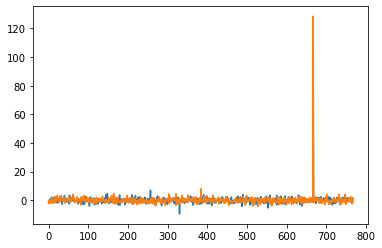

In [17]:
from transformers import AutoTokenizer, pipeline, TFXLNetModel
xlnet_features1=transformer_embedding('xlnet-base-cased',z[0],TFXLNetModel)
xlnet_features2=transformer_embedding('xlnet-base-cased',z[1],TFXLNetModel)
distance=1-cosine(xlnet_features1[0],xlnet_features2[0])
print(distance)
plt.plot(xlnet_features1[0])
plt.plot(xlnet_features2[0])
plt.show()

## BART Model

[This](https://arxiv.org/abs/1910.13461) is alternate SOTA model to denoise sentence2 sentence pretraining for natural language generation,comprehension etc. The most important points can be summarized as:


- Bart uses a standard seq2seq/machine translation architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT).

- The pretraining task involves randomly shuffling the order of the original sentences and a novel in-filling scheme, where spans of text are replaced with a single mask token.

- BART is particularly effective when fine tuned for text generation but also works well for comprehension tasks. It matches the performance of RoBERTa with comparable training resources on GLUE and SQuAD, achieves new state-of-the-art results on a range of abstractive dialogue, question answering, and summarization tasks, with gains of up to 6 ROUGE.

The architecture contains these encoder -decoder modules :
<img src="https://miro.medium.com/max/3138/1*Qss9gtS1nw_sgcG1pMAM2A.png">

<img src="https://miseciara.files.wordpress.com/2013/11/bart.gif">


Some resources:
- [Blog](https://medium.com/dair-ai/bart-are-all-pretraining-techniques-created-equal-e869a490042e)
- [Blog-BART](https://medium.com/analytics-vidhya/revealing-bart-a-denoising-objective-for-pretraining-c6e8f8009564)

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/558M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

0.9844314916786725


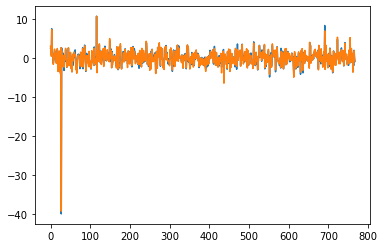

In [18]:
from transformers import AutoTokenizer, pipeline, BartModel
bart_features1=transformer_embedding('facebook/bart-base',z[0],BartModel)
bart_features2=transformer_embedding('facebook/bart-base',z[1],BartModel)
distance=1-cosine(bart_features1[0],bart_features2[0])
print(distance)
plt.plot(bart_features1[0])
plt.plot(bart_features2[0])
plt.show()

## Albert Model

[This](https://arxiv.org/abs/1909.11942) is a lighter version of BERT which splits the embedding matrix into 2 smaller matrices and uses repeated splitting in between the transformer layers.Some important points:


- ALBERT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- ALBERT uses repeating layers which results in a small memory footprint, however the computational cost remains similar to a BERT-like architecture with the same number of hidden layers as it has to iterate through the same number of (repeating) layers.

Resources:
-[Source code](https://github.com/google-research/ALBERT)
- [Blog](https://medium.com/@lessw/meet-albert-a-new-lite-bert-from-google-toyota-with-state-of-the-art-nlp-performance-and-18x-df8f7b58fa28)
- [Blog](https://medium.com/doxastar/from-bert-to-albert-pre-trained-langaug-models-5865aa5c3762)

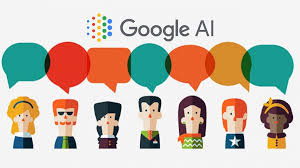

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/63.0M [00:00<?, ?B/s]

Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


0.8489483124077785


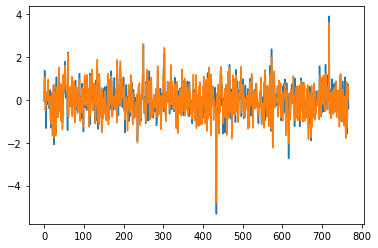

In [19]:
from transformers import AutoTokenizer, pipeline, TFAlbertModel
albert_features1=transformer_embedding('albert-base-v1',z[0],TFAlbertModel)
albert_features2=transformer_embedding('albert-base-v1',z[1],TFAlbertModel)
distance=1-cosine(albert_features1[0],albert_features2[0])
print(distance)
plt.plot(albert_features1[0])
plt.plot(albert_features2[0])
plt.show()

Downloading:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/896k [00:00<?, ?B/s]

0.6605776799641232


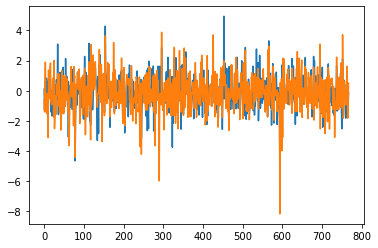

In [20]:
#sophisticated variants of BERT
from transformers import AutoTokenizer, pipeline, FlaubertModel
flaubert_features1=transformer_embedding('flaubert/flaubert_base_cased',z[0],FlaubertModel)
flaubert_features2=transformer_embedding('flaubert/flaubert_base_cased',z[1],FlaubertModel)
distance=1-cosine(flaubert_features1[0],flaubert_features2[0])
print(distance)
plt.plot(flaubert_features1[0])
plt.plot(flaubert_features2[0])
plt.show()

## GPT-Generative Pretraining

[This](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf) is a different model from BERT and its variants built primarily for NLG (generative modelling).  GPT has the following important points:


- GPT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- GPT was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

Some resources are helpful:

- [GPT](https://medium.com/dataseries/openai-gpt-generative-pre-training-for-language-understanding-bbbdb42b7ff4)
- [Openai](https://openai.com/blog/better-language-models/)
- [Imgae GPT](https://openai.com/blog/image-gpt/)

<img src="https://www.topbots.com/wp-content/uploads/2019/04/cover_GPT_web.jpg">

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


Downloading:   0%|          | 0.00/816k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/458k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


0.45173711240184744


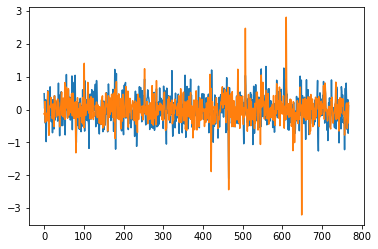

In [21]:
#GPT embeddings
from transformers import AutoTokenizer, pipeline, TFOpenAIGPTModel
def transformer_gpt_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
gpt_features1=transformer_gpt_embedding('openai-gpt',z[0],TFOpenAIGPTModel)
gpt_features2=transformer_gpt_embedding('openai-gpt',z[1],TFOpenAIGPTModel)
distance=1-cosine(gpt_features1[0],gpt_features2[0])
print(distance)
plt.plot(gpt_features1[0])
plt.plot(gpt_features2[0])
plt.show()

## GPT-2

<img src="http://jalammar.github.io/images/gpt2/openAI-GPT-2-3.png">

It is a [robust model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.Some important aspects:

- GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

Resources:

- [GPT-2](http://jalammar.github.io/illustrated-gpt2/)
- [Source Code](https://github.com/openai/gpt-2)
- [Blog](https://www.analyticsvidhya.com/blog/2019/07/openai-gpt2-text-generator-python/)
- [Blog](https://towardsdatascience.com/openai-gpt-2-understanding-language-generation-through-visualization-8252f683b2f8)

It is important to note the effect of Attention and masking in GPT-2 model. These are represented in the diagram:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-1-2.png">
<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-3-2.png">

Self Attention:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-split-attention-heads-1.png">


Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['transformer/positions_embed/embeddings:0', 'transformer/tokens_embed/weight:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['transformer/wte/weight:0', 'transformer/ln_f/gamma:0', 'transformer/ln_f/beta:0', 'transformer/wpe/embeddings:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some layers from the m

0.9689669914242295


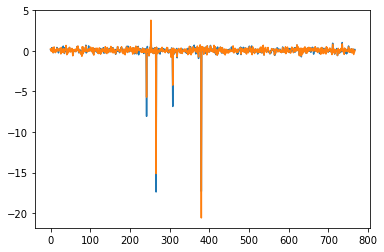

In [22]:
#GPT-2
from transformers import AutoTokenizer, pipeline, TFGPT2Model

gpt2_features1=transformer_gpt_embedding('openai-gpt',z[0],TFGPT2Model)
gpt2_features2=transformer_gpt_embedding('openai-gpt',z[1],TFGPT2Model)
distance=1-cosine(gpt2_features1[0],gpt2_features2[0])
print(distance)
plt.plot(gpt2_features1[0])
plt.plot(gpt2_features2[0])
plt.show()

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/54.5M [00:00<?, ?B/s]

Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


0.9233134225288018


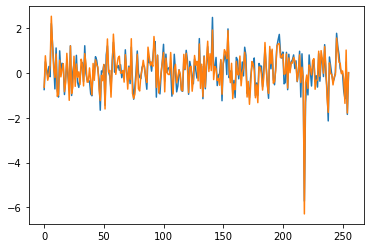

In [23]:
#Electra

from transformers import AutoTokenizer, pipeline, TFElectraModel
electra_features1=transformer_embedding('google/electra-small-discriminator',z[0],TFElectraModel)
electra_features2=transformer_embedding('google/electra-small-discriminator',z[1],TFElectraModel)
distance=1-cosine(electra_features1[0],electra_features2[0])
print(distance)
plt.plot(electra_features1[0])
plt.plot(electra_features2[0])
plt.show()

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/765M [00:00<?, ?B/s]

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.
Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_

0.9967174068493199


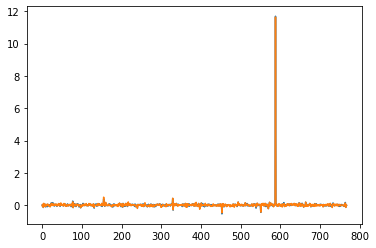

In [24]:
#Longformer
from transformers import AutoTokenizer, pipeline, TFLongformerModel
longformer_features1=transformer_embedding('allenai/longformer-base-4096',z[0],TFLongformerModel)
longformer_features2=transformer_embedding('allenai/longformer-base-4096',z[1],TFLongformerModel)
distance=1-cosine(longformer_features1[0],longformer_features2[0])
print(distance)
plt.plot(longformer_features1[0])
plt.plot(longformer_features2[0])
plt.show()

## BERT Embeddings From Pytorch

Since we have explored Transformer Embeddings, we will be looking into using pretrained BERT embedding from [Pytorch](https://pytorch.org/hub/huggingface_pytorch-transformers/).
We will be downloading BERT from [Pytorch Pretrained BERT](https://pypi.org/project/pytorch-pretrained-bert/).
This is one of the initial starting libraries for Huggingface.


Some important resources:

- [Notebook](https://www.kaggle.com/christofhenkel/bert-embeddings-lstm)
- [Blog](https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1)


<img src="https://miro.medium.com/max/875/1*Pvyx8-QWdo_WBghNOd-zGA.png">

In [29]:
#Import BERT and the variables
import os
BERT_MODEL = 'bert-base-uncased'
CASED = 'uncased' in BERT_MODEL
INPUT = '../input/'
TEXT_COL = 'comment_text'
MAXLEN = 250
# os.system('pip install --no-index --find-links="../input/pytorchpretrainedbert/" pytorch_pretrained_bert')

In [27]:
#Error Cause
os.system('pip install --no-index --find-links="../input/pytorchpretrainedbert/" pytorch_pretrained_bert')

256

In [ ]:
#Load  from pytorch pretrained model- weights
from pytorch_pretrained_bert import BertTokenizer
from pytorch_pretrained_bert.modeling import BertModel

#BERT_FP = '../input/torch-bert-weights/bert-base-uncased/bert-base-uncased/'
#Function for creating BERT embeddings-matrix
def bert_embedding_matrix():
    bert = BertModel.from_pretrained('bert-base-uncased')
    print(bert)
    bert_embeddings = list(bert.children())[0]
    bert_word_embeddings = list(bert_embeddings.children())[0]
    mat = bert_word_embeddings.weight.data.numpy()
    return mat
embedding_matrix = bert_embedding_matrix()
print(embedding_matrix.shape)

In [ ]:
plt.plot(embedding_matrix[0])
plt.plot(embedding_matrix[1])
plt.plot(embedding_matrix[2])
plt.show()

## Embeddings Conclusion and Key Takeaways

This Notebook has provided an idea of using a code segment for multiple Transformer based embedding models . For this it is to be kept in mind that most of these embedding models are very big architectures-Transformers - which we will be taking up in the next session on Model building. Since the codes are mostly in Tensorflow Keras, some additional resources are provided for running them in Pytorch:

- [BERT Embeddings Pytorch](https://www.kaggle.com/abhilash1910/bertsimilarity-library)
- [NLP Workshop](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)
- [Workshop1](https://www.kaggle.com/abhilash1910/nlp-workshop-ml-india)

Will be updating with more reseources. We have explored embeddings (static and dynamic) and also had an idea on the entire NLP pipeline till embeddings!! Now we know the power of model agnostic code  in NLP.

<img src="https://img.cinemablend.com/filter:scale/quill/2/0/d/8/1/6/20d81656d25ffbc06d6b2e382241661c629972e1.jpg?mw=600">


Next module- [Notebook](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)